In [2]:
suppressMessages(require(Seurat))
suppressMessages(require(ggplot2))
suppressMessages(require(dplyr))
suppressMessages(require(reticulate))
suppressMessages(require(stringr))
suppressMessages(require(ggpubr))
suppressMessages(require(viridisLite))

In [3]:
source('modules/reformatProjRes.R')
source('benchmarking/readBenchmarkRes.R')

In [4]:
out.figs.dir <- '../2.results/review01/figs'
out.data.dir <- '../2.results/review01/data'

In [5]:
RMSE = function(m, o){
  sqrt(mean((m - o)^2))
}

In [6]:
data_summary <- function(data, varname, groupnames){
  require(plyr)
  summary_func <- function(x, col){
    c(mean = mean(x[[col]], na.rm=TRUE),
      sd = sd(x[[col]], na.rm=TRUE))
  }
  data_sum<-ddply(data, groupnames, .fun=summary_func,
                  varname)
  data_sum <- rename(data_sum, c("mean" = varname))
 return(data_sum)
}

### Loading dataset: Lambda = 5

In [7]:
decon.tools <- c("Cell2location", "SpatialDWLS", "RCTD", "Stereoscope", "DestVI", "SpaOTsc", "novoSpaRc", "SPOTlight", "CARD", "DSTG")
seg.tools <- c("Cell2Spatial", "CellTrek", "CytoSPACE", "Tangram", "Seurat")

In [8]:
COLS <- c(
    Cell2Spatial = '#7C8E7D',
    CytoSPACE = '#E18EE2',
    CellTrek = '#E2B199',
    Tangram = '#DAD3E5',
    Seurat = '#E2DB8F',
    Cell2location = '#899CC8',
    SpatialDWLS = '#6C70ED',
    RCTD = '#E3ED34',
    Stereoscope = '#C6DEC2',
    DestVI = '#A3A1B2',
    SpaOTsc = '#F3CDDF',
    novoSpaRc = '#9E0018',
    SPOTlight = '#888570',
    CARD = '#A0C669',
    DSTG = '#C6C6A2'
)

In [9]:
obj.sc <- readRDS('benchmarking/data/allen_cortex.rds')
obj.st <- readRDS('benchmarking/data/stxBrain.sim.5.rds')

In [10]:
dat.prop <- readAsProportions(obj.sc, obj.st, 'benchmarking/results/Sim.5/')

In [11]:
head(dat.prop)

,Astro,CR,Endo,L2.3.IT,L4,L5.IT,L5.PT,L6.CT,L6.IT,L6b,⋯,Peri,Pvalb,SMC,Serpinf1,Sncg,Sst,VLMC,Vip,Tool,Spot
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
AAACAAGTATCTCCCA.1,0.03422745,0.03579051,0.03442893,0.03675219,0.03637415,0.03913700,0.03957655,0.03756199,0.03768603,0.03737468,⋯,0.03422616,0.09456839,0.03473001,0.04468347,0.04720032,0.05140525,0.03451989,0.04893859,Cell2location,AAACAAGTATCTCCCA.1
AAACACCAATAACTGC.1,0.03322058,0.03440075,0.03157730,0.03683260,0.03824924,0.04047452,0.04496808,0.03850685,0.03805636,0.04059378,⋯,0.03139244,0.08644813,0.03367997,0.05025946,0.05535944,0.07624744,0.03212705,0.05797794,Cell2location,AAACACCAATAACTGC.1
AAACAGAGCGACTCCT.1,0.02808552,0.03028089,0.02846315,0.06997893,0.06659606,0.06511988,0.06430212,0.05893440,0.06729515,0.05569644,⋯,0.02821235,0.03869390,0.02833411,0.03607172,0.03989493,0.04612637,0.02819857,0.04109305,Cell2location,AAACAGAGCGACTCCT.1
AAACAGCTTTCAGAAG.1,0.03758258,0.04798102,0.02425313,0.04749890,0.04921322,0.04642659,0.04679066,0.04846144,0.04892151,0.04787067,⋯,0.02586923,0.05023925,0.02711922,0.05089744,0.05198878,0.04888339,0.02472811,0.05282339,Cell2location,AAACAGCTTTCAGAAG.1
AAACAGGGTCTATATT.1,0.03801349,0.04243134,0.03714035,0.04170703,0.04327597,0.04091748,0.04107684,0.04237693,0.04262142,0.04102233,⋯,0.03717419,0.04290155,0.03783183,0.04343442,0.04406215,0.04272154,0.03644499,0.04693019,Cell2location,AAACAGGGTCTATATT.1
AAACATGGTGAGAGGA.1,0.07780708,0.04199785,0.04649920,0.03137391,0.03619371,0.03518385,0.03633744,0.03615111,0.03412134,0.03361176,⋯,0.04910539,0.04348178,0.05028630,0.04142922,0.04395409,0.03683339,0.05666012,0.04686855,Cell2location,AAACATGGTGAGAGGA.1


In [12]:
true.prop <- readRDS('./benchmarking/data/stxBrain.5.true.coord.rds')
lapply(split(true.prop$CellName, true.prop$SpotID), length) %>% unlist %>% max

[1] 17

In [13]:
true.prop <- table(true.prop$SpotID, true.prop$CellType) %>% as.data.frame.matrix
true.prop <- sweep(true.prop, 1, rowSums(true.prop), '/')
colnames(true.prop) <- gsub('/| ', '\\.', colnames(true.prop))
true.prop <- true.prop[, colnames(dat.prop)[1 : 23]]
head(true.prop)

,Astro,CR,Endo,L2.3.IT,L4,L5.IT,L5.PT,L6.CT,L6.IT,L6b,⋯,NP,Oligo,Peri,Pvalb,SMC,Serpinf1,Sncg,Sst,VLMC,Vip
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AAACAAGTATCTCCCA-1,0,0,0,0,0,0,0,0,0,0,⋯,0,0.3333333,0,0.6666667,0,0,0,0,0,0
AAACACCAATAACTGC-1,0,0,0,0,0,0,0,0,0,0,⋯,0,0.0000000,0,1.0000000,0,0,0,0,0,0
AAACAGAGCGACTCCT-1,0,0,0,1,0,0,0,0,0,0,⋯,0,0.0000000,0,0.0000000,0,0,0,0,0,0
AAACAGCTTTCAGAAG-1,0,0,0,0,0,0,0,0,0,0,⋯,0,0.0000000,0,0.0000000,0,0,0,0,0,0
AAACAGGGTCTATATT-1,0,0,0,0,0,0,0,0,0,0,⋯,0,0.0000000,0,0.0000000,0,0,0,0,0,0
AAACATGGTGAGAGGA-1,1,0,0,0,0,0,0,0,0,0,⋯,0,0.0000000,0,0.0000000,0,0,0,0,0,0


In [14]:
options(warn = -1)
ref.prop <- colSums(true.prop) / sum(colSums(true.prop))
plot.df <- lapply(unique(dat.prop$Tool), function(tool) {
    dat.prop.sub <- subset(dat.prop, Tool == tool)
    cor.res <- lapply(1 : 100, function(idx) {
        spot.names <- sample(rownames(dat.prop.sub), 2000)
        qry.prop <- colSums(dat.prop.sub[spot.names, 1 : 23]) / sum(colSums(dat.prop.sub[spot.names, 1 : 23]))
        cor(qry.prop, ref.prop, method = 'pearson')
    }) %>% unlist %>% as.vector
    cbind.data.frame(Cor = cor.res, Rep = 1 : 100, Tool = tool)
}) %>% do.call(rbind, .)

In [41]:
df2 <- data_summary(plot.df, varname="Cor", groupnames=c("Tool"))

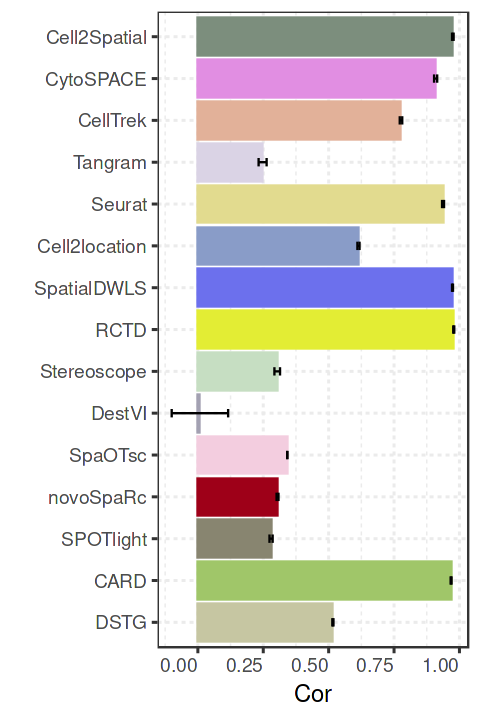

In [42]:
options(repr.plot.width = 4, repr.plot.height = 6)
df2$Tool <- factor(df2$Tool, levels = names(COLS) %>% rev)
ggplot(df2, aes(x = Tool, y = Cor, fill = Tool)) + geom_bar(stat="identity", position=position_dodge(), aes(colour = Tool)) + geom_errorbar(aes(ymin=Cor-sd, ymax=Cor+sd), width=.2, position=position_dodge(.9))+ theme_bw(base_size = 14) + theme(panel.grid = element_line(linetype = 'dashed'), axis.text.x = element_text(angle = 0, hjust = 1), legend.position = 'none') + xlab('') + coord_flip() + scale_fill_manual(values = COLS) + scale_color_manual(values = COLS)
ggsave(file.path(out.figs.dir, 'sim.5_cor.pdf'), width = 4, height = 6)

In [43]:
aggregate(Cor ~ Tool, plot.df, 'mean')

Tool,Cor
<chr>,<dbl>
CARD,0.968017020
Cell2Spatial,0.974707301
Cell2location,0.613967408
CellTrek,0.776526193
CytoSPACE,0.908949820
DSTG,0.516200844
DestVI,0.007844683
RCTD,0.978194884
SPOTlight,0.279833991


In [44]:
options(warn = -1)
ref.prop <- colSums(true.prop) / sum(colSums(true.prop))
plot.df <- lapply(unique(dat.prop$Tool), function(tool) {
    dat.prop.sub <- subset(dat.prop, Tool == tool)
    cor.res <- lapply(1 : 100, function(idx) {
        spot.names <- sample(rownames(dat.prop.sub), 2000)
        qry.prop <- colSums(dat.prop.sub[spot.names, 1 : 23]) / sum(colSums(dat.prop.sub[spot.names, 1 : 23]))
        RMSE(qry.prop, ref.prop)
    }) %>% unlist %>% as.vector
    cbind.data.frame(Cor = cor.res, Rep = 1 : 100, Tool = tool)
}) %>% do.call(rbind, .)

In [45]:
df2 <- data_summary(plot.df, varname="Cor", groupnames=c("Tool"))

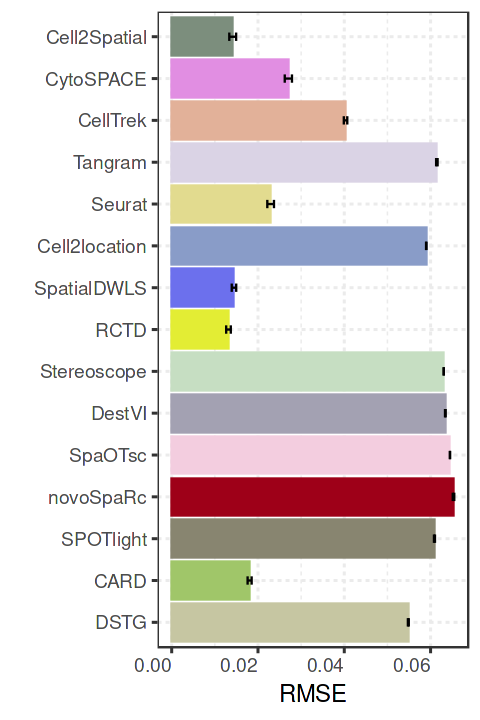

In [46]:
options(repr.plot.width = 4, repr.plot.height = 6)
df2$Tool <- factor(df2$Tool, levels = names(COLS) %>% rev)
ggplot(df2, aes(x = Tool, y = Cor, fill = Tool)) + geom_bar(stat="identity", position=position_dodge(), aes(colour = Tool)) + geom_errorbar(aes(ymin=Cor-sd, ymax=Cor+sd), width=.2, position=position_dodge(.9))+ theme_bw(base_size = 14) + theme(panel.grid = element_line(linetype = 'dashed'), axis.text.x = element_text(angle = 0, hjust = 1), legend.position = 'none') + xlab('') + coord_flip() + scale_fill_manual(values = COLS) + scale_color_manual(values = COLS) + ylab('RMSE')

ggsave(file.path(out.figs.dir, 'sim.5_rmse.pdf'), width = 4, height = 6)


In [47]:
aggregate(Cor ~ Tool, plot.df, 'mean')

Tool,Cor
<chr>,<dbl>
CARD,0.01806175
Cell2Spatial,0.01414152
Cell2location,0.05899221
CellTrek,0.04029367
CytoSPACE,0.02703895
DSTG,0.05484198
DestVI,0.06341635
RCTD,0.01316279
SPOTlight,0.06090335


### Dataset: Lambda = 10

In [15]:
obj.st <- readRDS('benchmarking/data/stxBrain.sim.10.rds')

In [16]:
dat.prop <- readAsProportions(obj.sc, obj.st, 'benchmarking/results/Sim.10/')

In [17]:
true.prop <- readRDS('./benchmarking/data/stxBrain.10.true.coord.rds')
lapply(split(true.prop$CellName, true.prop$SpotID), length) %>% unlist %>% max

[1] 24

In [18]:
true.prop <- table(true.prop$SpotID, true.prop$CellType) %>% as.data.frame.matrix
true.prop <- sweep(true.prop, 1, rowSums(true.prop), '/')
colnames(true.prop) <- gsub('/| ', '\\.', colnames(true.prop))
true.prop <- true.prop[, colnames(dat.prop)[1 : 23]]

In [19]:
head(dat.prop)

,Astro,CR,Endo,L2.3.IT,L4,L5.IT,L5.PT,L6.CT,L6.IT,L6b,⋯,Peri,Pvalb,SMC,Serpinf1,Sncg,Sst,VLMC,Vip,Tool,Spot
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
AAACAAGTATCTCCCA.1,0.03480711,0.03593602,0.03443881,0.03670029,0.03665502,0.03898603,0.03947557,0.03751897,0.03732853,0.03782668,⋯,0.03439833,0.09765246,0.03491653,0.04437458,0.04638087,0.05293821,0.03437992,0.04759915,Cell2location,AAACAAGTATCTCCCA.1
AAACACCAATAACTGC.1,0.03055008,0.03184901,0.02944866,0.03396595,0.03618130,0.04078498,0.04795632,0.03792041,0.03692086,0.04074766,⋯,0.02913126,0.07728670,0.03147704,0.05730049,0.06186694,0.07421858,0.02974605,0.06643117,Cell2location,AAACACCAATAACTGC.1
AAACAGAGCGACTCCT.1,0.03248033,0.03390969,0.03262272,0.08484926,0.07252872,0.05906969,0.05539548,0.04604472,0.07480262,0.04203674,⋯,0.03237161,0.03743828,0.03261496,0.03646813,0.03755459,0.03911218,0.03237230,0.03847602,Cell2location,AAACAGAGCGACTCCT.1
AAACAGCTTTCAGAAG.1,0.03067129,0.03914869,0.03097990,0.04189172,0.04208508,0.04036147,0.04040209,0.04543273,0.04617844,0.04292354,⋯,0.03172387,0.04825798,0.03169613,0.05426392,0.05413792,0.04608570,0.03138870,0.05765827,Cell2location,AAACAGCTTTCAGAAG.1
AAACAGGGTCTATATT.1,0.02882969,0.04545924,0.02772701,0.04561078,0.04659414,0.04500805,0.04457814,0.04825704,0.04738507,0.04585322,⋯,0.02724837,0.05095833,0.02768760,0.05266026,0.05313075,0.04872378,0.02697107,0.05709286,Cell2location,AAACAGGGTCTATATT.1
AAACATGGTGAGAGGA.1,0.09602319,0.04101012,0.04101853,0.03362938,0.03575139,0.03554221,0.03496816,0.03577359,0.03529966,0.03497686,⋯,0.04619397,0.04029377,0.04386273,0.04202230,0.04033792,0.03636329,0.05590744,0.04281853,Cell2location,AAACATGGTGAGAGGA.1


In [20]:
options(warn = -1)
ref.prop <- colSums(true.prop) / sum(colSums(true.prop))
plot.df <- lapply(unique(dat.prop$Tool), function(tool) {
    dat.prop.sub <- subset(dat.prop, Tool == tool)
    cor.res <- lapply(1 : 100, function(idx) {
        spot.names <- sample(rownames(dat.prop.sub), floor(min(2000, nrow(dat.prop.sub)) * 0.8))
        qry.prop <- colSums(dat.prop.sub[spot.names, 1 : 23]) / sum(colSums(dat.prop.sub[spot.names, 1 : 23]))
        cor(qry.prop, ref.prop, method = 'pearson')
    }) %>% unlist %>% as.vector
    cbind.data.frame(Cor = cor.res, Rep = 1 : 100, Tool = tool)
}) %>% do.call(rbind, .)

In [21]:
df2 <- data_summary(plot.df, varname="Cor", groupnames=c("Tool"))

Loading required package: plyr

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following object is masked from ‘package:ggpubr’:

    mutate


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize




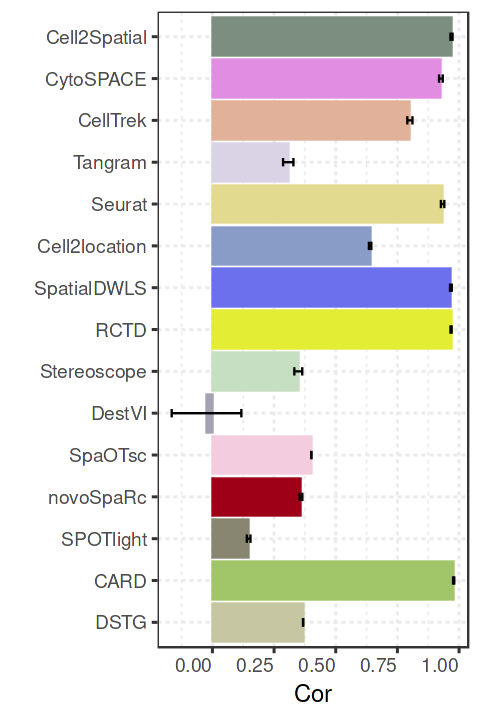

In [22]:
options(repr.plot.width = 4, repr.plot.height = 6)
df2$Tool <- factor(df2$Tool, levels = names(COLS) %>% rev)
ggplot(df2, aes(x = Tool, y = Cor, fill = Tool)) + geom_bar(stat="identity", position=position_dodge(), aes(colour = Tool)) + geom_errorbar(aes(ymin=Cor-sd, ymax=Cor+sd), width=.2, position=position_dodge(.9))+ theme_bw(base_size = 14) + theme(panel.grid = element_line(linetype = 'dashed'), axis.text.x = element_text(angle = 0, hjust = 1), legend.position = 'none') + xlab('') + coord_flip() + scale_fill_manual(values = COLS) + scale_color_manual(values = COLS)
ggsave(file.path(out.figs.dir, 'sim.10_cor.pdf'), width = 4, height = 6)

In [67]:
aggregate(Cor ~ Tool, plot.df, 'mean')

Tool,Cor
<chr>,<dbl>
CARD,0.97815867
Cell2Spatial,0.96974264
Cell2location,0.64008135
CellTrek,0.80012896
CytoSPACE,0.92566296
DSTG,0.36752663
DestVI,-0.02248417
RCTD,0.96768808
SPOTlight,0.14616331


In [69]:
options(warn = -1)
ref.prop <- colSums(true.prop) / sum(colSums(true.prop))
plot.df <- lapply(unique(dat.prop$Tool), function(tool) {
    dat.prop.sub <- subset(dat.prop, Tool == tool)
    cor.res <- lapply(1 : 100, function(idx) {
        spot.names <- sample(rownames(dat.prop.sub), floor(min(2000, nrow(dat.prop.sub)) * 0.8))
        qry.prop <- colSums(dat.prop.sub[spot.names, 1 : 23]) / sum(colSums(dat.prop.sub[spot.names, 1 : 23]))
        RMSE(qry.prop, ref.prop)
    }) %>% unlist %>% as.vector
    cbind.data.frame(Cor = cor.res, Rep = 1 : 100, Tool = tool)
}) %>% do.call(rbind, .)

In [70]:
df2 <- data_summary(plot.df, varname="Cor", groupnames=c("Tool"))

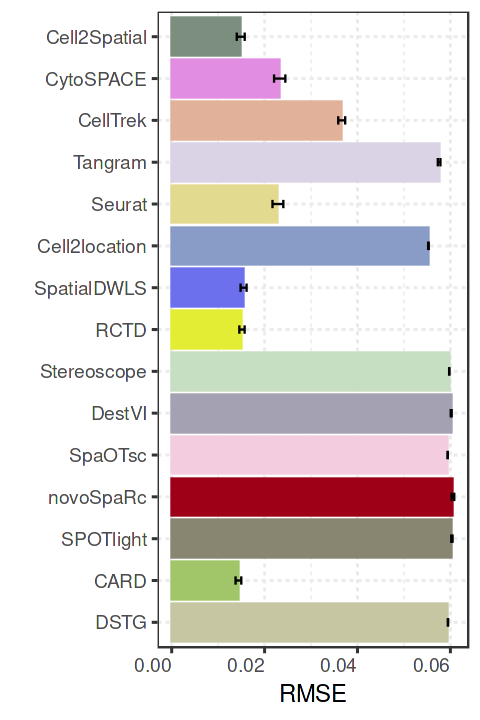

In [71]:
options(repr.plot.width = 4, repr.plot.height = 6)
df2$Tool <- factor(df2$Tool, levels = names(COLS) %>% rev)
ggplot(df2, aes(x = Tool, y = Cor, fill = Tool)) + geom_bar(stat="identity", position=position_dodge(), aes(colour = Tool)) + geom_errorbar(aes(ymin=Cor-sd, ymax=Cor+sd), width=.2, position=position_dodge(.9))+ theme_bw(base_size = 14) + theme(panel.grid = element_line(linetype = 'dashed'), axis.text.x = element_text(angle = 0, hjust = 1), legend.position = 'none') + xlab('') + coord_flip() + scale_fill_manual(values = COLS) + scale_color_manual(values = COLS) + ylab('RMSE')

ggsave(file.path(out.figs.dir, 'sim.10_rmse.pdf'), width = 4, height = 6)

### Dataset: Lambda = 15

In [23]:
obj.st <- readRDS('benchmarking/data/stxBrain.sim.15.rds')

In [24]:
dat.prop <- readAsProportions(obj.sc, obj.st, 'benchmarking/results/Sim.15/')

In [25]:
true.prop <- readRDS('./benchmarking/data/stxBrain.15.true.coord.rds')
lapply(split(true.prop$CellName, true.prop$SpotID), length) %>% unlist %>% max

[1] 32

In [26]:
true.prop <- table(true.prop$SpotID, true.prop$CellType) %>% as.data.frame.matrix
true.prop <- sweep(true.prop, 1, rowSums(true.prop), '/')
colnames(true.prop) <- gsub('/| ', '\\.', colnames(true.prop))
true.prop <- true.prop[, colnames(dat.prop)[1 : 23]]
head(true.prop)

,Astro,CR,Endo,L2.3.IT,L4,L5.IT,L5.PT,L6.CT,L6.IT,L6b,⋯,NP,Oligo,Peri,Pvalb,SMC,Serpinf1,Sncg,Sst,VLMC,Vip
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AAACAAGTATCTCCCA-1,0,0,0,0,0,0,0,0,0,0,⋯,0,0.1428571,0,0.8571429,0,0,0,0.00000000,0,0
AAACACCAATAACTGC-1,0,0,0,0,0,0,0,0,0,0,⋯,0,0.0000000,0,0.9545455,0,0,0,0.04545455,0,0
AAACAGAGCGACTCCT-1,0,0,0,1,0,0,0,0,0,0,⋯,0,0.0000000,0,0.0000000,0,0,0,0.00000000,0,0
AAACAGCTTTCAGAAG-1,0,0,0,0,0,0,0,0,0,0,⋯,0,0.0000000,0,0.0000000,0,0,0,0.00000000,0,0
AAACAGGGTCTATATT-1,0,0,0,0,0,0,0,0,0,0,⋯,0,0.0000000,0,0.0000000,0,0,0,0.00000000,0,0
AAACATGGTGAGAGGA-1,1,0,0,0,0,0,0,0,0,0,⋯,0,0.0000000,0,0.0000000,0,0,0,0.00000000,0,0


In [27]:
#lapply(split(true.prop$CellName, true.prop$SpotID), length) %>% unlist %>% max

In [28]:
options(warn = -1)
ref.prop <- colSums(true.prop) / sum(colSums(true.prop))
plot.df <- lapply(unique(dat.prop$Tool), function(tool) {
    dat.prop.sub <- subset(dat.prop, Tool == tool)
    cor.res <- lapply(1 : 100, function(idx) {
        spot.names <- sample(rownames(dat.prop.sub), floor(min(2000, nrow(dat.prop.sub)) * 0.8))
        qry.prop <- colSums(dat.prop.sub[spot.names, 1 : 23]) / sum(colSums(dat.prop.sub[spot.names, 1 : 23]))
        cor(qry.prop, ref.prop, method = 'pearson')
    }) %>% unlist %>% as.vector
    cbind.data.frame(Cor = cor.res, Rep = 1 : 100, Tool = tool)
}) %>% do.call(rbind, .)

In [29]:
aggregate(Cor ~ Tool, plot.df, 'mean')

Tool,Cor
<chr>,<dbl>
CARD,0.98340592
Cell2Spatial,0.97626965
Cell2location,0.65698695
CellTrek,0.83186653
CytoSPACE,0.95117366
DSTG,0.55671967
DestVI,-0.02119862
RCTD,0.96561212
SPOTlight,0.07111533


In [30]:
df2 <- data_summary(plot.df, varname="Cor", groupnames=c("Tool"))

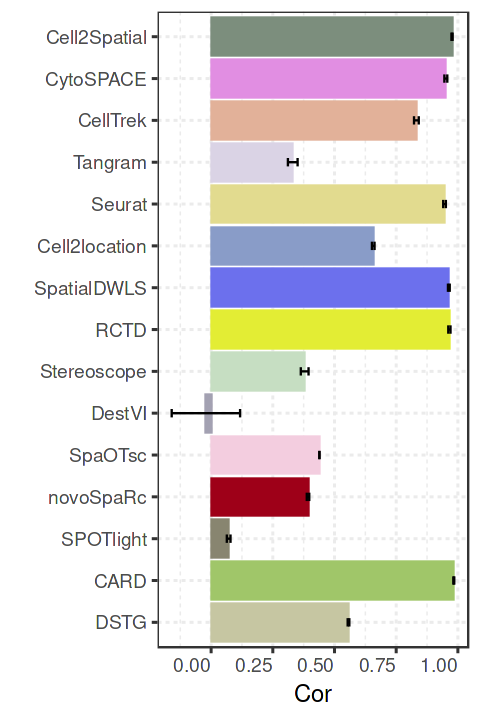

In [31]:
options(repr.plot.width = 4, repr.plot.height = 6)
df2$Tool <- factor(df2$Tool, levels = names(COLS) %>% rev)
ggplot(df2, aes(x = Tool, y = Cor, fill = Tool)) + geom_bar(stat="identity", position=position_dodge(), aes(colour = Tool)) + geom_errorbar(aes(ymin=Cor-sd, ymax=Cor+sd), width=.2, position=position_dodge(.9))+ theme_bw(base_size = 14) + theme(panel.grid = element_line(linetype = 'dashed'), axis.text.x = element_text(angle = 0, hjust = 1), legend.position = 'none') + xlab('') + coord_flip() + scale_fill_manual(values = COLS) + scale_color_manual(values = COLS)
ggsave(file.path(out.figs.dir, 'sim.15_cor.pdf'), width = 4, height = 6)

In [87]:
options(warn = -1)
ref.prop <- colSums(true.prop) / sum(colSums(true.prop))
plot.df <- lapply(unique(dat.prop$Tool), function(tool) {
    dat.prop.sub <- subset(dat.prop, Tool == tool)
    cor.res <- lapply(1 : 100, function(idx) {
        spot.names <- sample(rownames(dat.prop.sub), floor(min(2000, nrow(dat.prop.sub)) * 0.8))
        qry.prop <- colSums(dat.prop.sub[spot.names, 1 : 23]) / sum(colSums(dat.prop.sub[spot.names, 1 : 23]))
        RMSE(qry.prop, ref.prop)
    }) %>% unlist %>% as.vector
    cbind.data.frame(Cor = cor.res, Rep = 1 : 100, Tool = tool)
}) %>% do.call(rbind, .)

In [88]:
aggregate(Cor ~ Tool, plot.df, 'mean')

Tool,Cor
<chr>,<dbl>
CARD,0.01247042
Cell2Spatial,0.01369569
Cell2location,0.05327339
CellTrek,0.03358801
CytoSPACE,0.01877457
DSTG,0.04957446
DestVI,0.05857195
RCTD,0.01507891
SPOTlight,0.06059850


In [81]:
df2 <- data_summary(plot.df, varname="Cor", groupnames=c("Tool"))

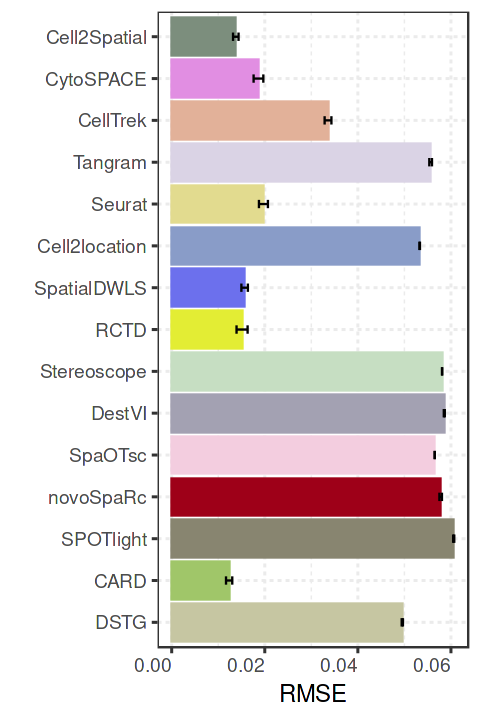

In [82]:
options(repr.plot.width = 4, repr.plot.height = 6)
df2$Tool <- factor(df2$Tool, levels = names(COLS) %>% rev)
ggplot(df2, aes(x = Tool, y = Cor, fill = Tool)) + geom_bar(stat="identity", position=position_dodge(), aes(colour = Tool)) + geom_errorbar(aes(ymin=Cor-sd, ymax=Cor+sd), width=.2, position=position_dodge(.9))+ theme_bw(base_size = 14) + theme(panel.grid = element_line(linetype = 'dashed'), axis.text.x = element_text(angle = 0, hjust = 1), legend.position = 'none') + xlab('') + coord_flip() + scale_fill_manual(values = COLS) + scale_color_manual(values = COLS) + ylab('RMSE')

ggsave(file.path(out.figs.dir, 'sim.15_rmse.pdf'), width = 4, height = 6)

### Dataset: Lambda = 20

In [32]:
obj.st <- readRDS('benchmarking/data/stxBrain.sim.20.rds')

In [33]:
dat.prop <- readAsProportions(obj.sc, obj.st, 'benchmarking/results/Sim.20/')

In [34]:
true.prop <- readRDS('./benchmarking/data/stxBrain.20.true.coord.rds')
lapply(split(true.prop$CellName, true.prop$SpotID), length) %>% unlist %>% max

[1] 40

In [35]:
true.prop <- table(true.prop$SpotID, true.prop$CellType) %>% as.data.frame.matrix
true.prop <- sweep(true.prop, 1, rowSums(true.prop), '/')
colnames(true.prop) <- gsub('/| ', '\\.', colnames(true.prop))
true.prop <- true.prop[, colnames(dat.prop)[1 : 23]]
head(true.prop)

,Astro,CR,Endo,L2.3.IT,L4,L5.IT,L5.PT,L6.CT,L6.IT,L6b,⋯,NP,Oligo,Peri,Pvalb,SMC,Serpinf1,Sncg,Sst,VLMC,Vip
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AAACAAGTATCTCCCA-1,0,0,0,0,0,0,0,0,0,0,⋯,0,0.1052632,0,0.8947368,0,0,0,0.00000000,0,0
AAACACCAATAACTGC-1,0,0,0,0,0,0,0,0,0,0,⋯,0,0.0000000,0,0.9629630,0,0,0,0.03703704,0,0
AAACAGAGCGACTCCT-1,0,0,0,1,0,0,0,0,0,0,⋯,0,0.0000000,0,0.0000000,0,0,0,0.00000000,0,0
AAACAGCTTTCAGAAG-1,0,0,0,0,0,0,0,0,0,0,⋯,0,0.0000000,0,0.0000000,0,0,0,0.00000000,0,0
AAACAGGGTCTATATT-1,0,0,0,0,0,0,0,0,0,0,⋯,0,0.0000000,0,0.0000000,0,0,0,0.00000000,0,0
AAACATGGTGAGAGGA-1,1,0,0,0,0,0,0,0,0,0,⋯,0,0.0000000,0,0.0000000,0,0,0,0.00000000,0,0


In [36]:
options(warn = -1)
ref.prop <- colSums(true.prop) / sum(colSums(true.prop))
plot.df <- lapply(unique(dat.prop$Tool), function(tool) {
    dat.prop.sub <- subset(dat.prop, Tool == tool)
    cor.res <- lapply(1 : 100, function(idx) {
        spot.names <- sample(rownames(dat.prop.sub), floor(min(2000, nrow(dat.prop.sub)) * 0.8))
        qry.prop <- colSums(dat.prop.sub[spot.names, 1 : 23]) / sum(colSums(dat.prop.sub[spot.names, 1 : 23]))
        cor(qry.prop, ref.prop, method = 'pearson')
    }) %>% unlist %>% as.vector
    cbind.data.frame(Cor = cor.res, Rep = 1 : 100, Tool = tool)
}) %>% do.call(rbind, .)

In [37]:
aggregate(Cor ~ Tool, plot.df, 'mean')

Tool,Cor
<chr>,<dbl>
CARD,0.987153702
Cell2Spatial,0.971691188
Cell2location,0.661277858
CellTrek,0.830053458
CytoSPACE,0.973677020
DSTG,0.562882394
DestVI,-0.019436715
RCTD,0.909256499
SPOTlight,0.004534115


In [38]:
df2 <- data_summary(plot.df, varname="Cor", groupnames=c("Tool"))

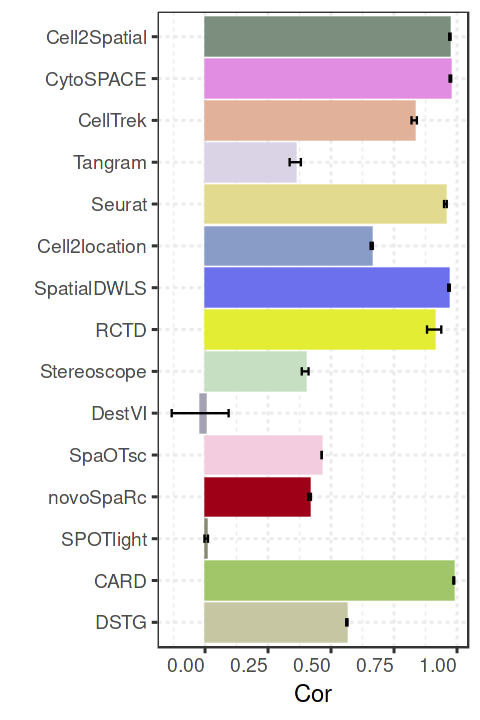

In [39]:
options(repr.plot.width = 4, repr.plot.height = 6)
df2$Tool <- factor(df2$Tool, levels = names(COLS) %>% rev)
ggplot(df2, aes(x = Tool, y = Cor, fill = Tool)) + geom_bar(stat="identity", position=position_dodge(), aes(colour = Tool)) + geom_errorbar(aes(ymin=Cor-sd, ymax=Cor+sd), width=.2, position=position_dodge(.9))+ theme_bw(base_size = 14) + theme(panel.grid = element_line(linetype = 'dashed'), axis.text.x = element_text(angle = 0, hjust = 1), legend.position = 'none') + xlab('') + coord_flip() + scale_fill_manual(values = COLS) + scale_color_manual(values = COLS)
ggsave(file.path(out.figs.dir, 'sim.20_cor.pdf'), width = 4, height = 6)

In [116]:
options(warn = -1)
ref.prop <- colSums(true.prop) / sum(colSums(true.prop))
plot.df <- lapply(unique(dat.prop$Tool), function(tool) {
    dat.prop.sub <- subset(dat.prop, Tool == tool)
    cor.res <- lapply(1 : 100, function(idx) {
        spot.names <- sample(rownames(dat.prop.sub), , floor(min(2000, nrow(dat.prop.sub)) * 0.8))
        qry.prop <- colSums(dat.prop.sub[spot.names, 1 : 23]) / sum(colSums(dat.prop.sub[spot.names, 1 : 23]))
        RMSE(qry.prop, ref.prop)
    }) %>% unlist %>% as.vector
    cbind.data.frame(Cor = cor.res, Rep = 1 : 100, Tool = tool)
}) %>% do.call(rbind, .)

In [117]:
df2 <- data_summary(plot.df, varname="Cor", groupnames=c("Tool"))

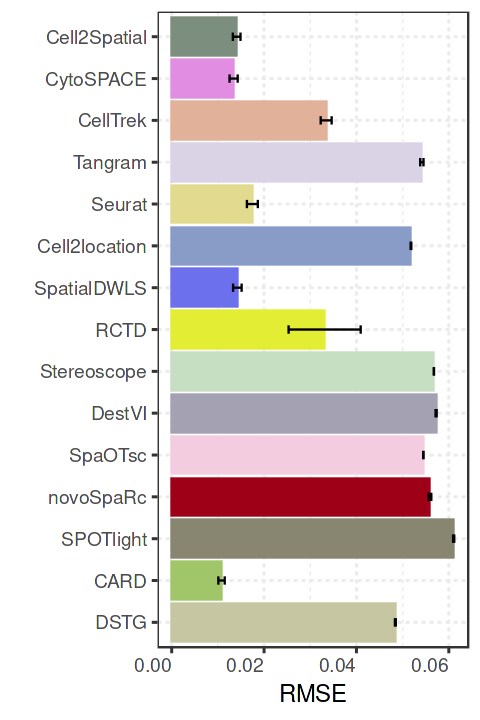

In [118]:
options(repr.plot.width = 4, repr.plot.height = 6)
df2$Tool <- factor(df2$Tool, levels = names(COLS) %>% rev)
ggplot(df2, aes(x = Tool, y = Cor, fill = Tool)) + geom_bar(stat="identity", position=position_dodge(), aes(colour = Tool)) + geom_errorbar(aes(ymin=Cor-sd, ymax=Cor+sd), width=.2, position=position_dodge(.9))+ theme_bw(base_size = 14) + theme(panel.grid = element_line(linetype = 'dashed'), axis.text.x = element_text(angle = 0, hjust = 1), legend.position = 'none') + xlab('') + coord_flip() + scale_fill_manual(values = COLS) + scale_color_manual(values = COLS) + ylab('RMSE')

ggsave(file.path(out.figs.dir, 'sim.20_rmse.pdf'), width = 4, height = 6)

In [119]:
aggregate(Cor ~ Tool, plot.df, 'mean')

Tool,Cor
<chr>,<dbl>
CARD,0.01079073
Cell2Spatial,0.01406789
Cell2location,0.05180441
CellTrek,0.03344572
CytoSPACE,0.01340449
DSTG,0.04842407
DestVI,0.05724458
RCTD,0.03311297
SPOTlight,0.06104875


### Gene expression decomposition

In [114]:
geneExprDecompCor <- function(obj.ref, obj.qry, tool) {
    DefaultAssay(obj.ref) <- 'SCT'
    ref.mat <- GetAssayData(obj.ref, assay = 'SCT') 
    qry.mat <- GetAssayData(obj.qry, assay = 'SCT') 
    ovp.genes <- intersect(VariableFeatures(obj.qry), VariableFeatures(obj.ref))
    ref.mat <- ref.mat[ovp.genes, ] %>% as.data.frame
    qry.mat <- qry.mat[ovp.genes, ] %>% as.data.frame
    if (length(setdiff(colnames(ref.mat), colnames(qry.mat))) > 0) {
        qry.mat[, setdiff(colnames(ref.mat), colnames(qry.mat))] <- runif(nrow(qry.mat), min(qry.mat), max(qry.mat))
    }
    cor.res <- lapply(1 : 100, function(idx) {
        gene.rand <- ovp.genes
        #gene.rand <- sample(ovp.genes, floor(min(length(ovp.genes), 1000) * 0.8))
        spot.all <- colnames(ref.mat)
        spot.rand <- sample(spot.all, floor(min(length(spot.all), 2000) * 0.8))
        lapply(spot.rand, function(spot) lsa::cosine(ref.mat[gene.rand, spot], qry.mat[gene.rand, spot])[1]) %>% unlist %>% as.vector %>% mean
    }) %>% unlist(.)
    res <- cbind.data.frame(Cor = cor.res, Rep = 1 : 100, Tool = tool)
    return(res)
}

In [510]:
out.dir <- 'benchmarking/results/Sim.5'
obj.sc <- readRDS('benchmarking/data/allen_cortex.rds')

In [511]:
obj.st <- readRDS('benchmarking/data/stxBrain.sim.5.rds')

In [512]:
obj.lst <- exprDecom(obj.sc, obj.st, out.dir)

In [513]:
cor.res.sim5 <- parallel::mclapply(names(obj.lst), function(tool) {
    obj.qry <- obj.lst[[tool]]
    res <- geneExprDecompCor(obj.st, obj.qry, tool)
    return(res)
}, mc.cores = 4) %>% do.call(rbind, .)

In [515]:
obj.st <- readRDS('benchmarking/data/stxBrain.sim.10.rds')
obj.lst <- exprDecom(obj.sc, obj.st, out.dir)

In [516]:
cor.res.sim10 <- parallel::mclapply(names(obj.lst), function(tool) {
    obj.qry <- obj.lst[[tool]]
    res <- geneExprDecompCor(obj.st, obj.qry, tool)
    return(res)
}, mc.cores = 4) %>% do.call(rbind, .)

In [518]:
obj.st <- readRDS('benchmarking/data/stxBrain.sim.15.rds')
obj.lst <- exprDecom(obj.sc, obj.st, out.dir)

In [519]:
cor.res.sim15 <- parallel::mclapply(names(obj.lst), function(tool) {
    obj.qry <- obj.lst[[tool]]
    res <- geneExprDecompCor(obj.st, obj.qry, tool)
    return(res)
}, mc.cores = 4) %>% do.call(rbind, .)

In [521]:
obj.st <- readRDS('benchmarking/data/stxBrain.sim.20.rds')
obj.lst <- exprDecom(obj.sc, obj.st, out.dir)

In [522]:
cor.res.sim20 <- parallel::mclapply(names(obj.lst), function(tool) {
    obj.qry <- obj.lst[[tool]]
    res <- geneExprDecompCor(obj.st, obj.qry, tool)
    return(res)
}, mc.cores = 4) %>% do.call(rbind, .)

In [540]:
plot.df <- cbind.data.frame(
    Lambda.5 = cor.res.sim5$Cor,
    Lambda.10 = cor.res.sim10$Cor,
    Lambda.15 = cor.res.sim15$Cor,
    Lambda.20 = cor.res.sim20$Cor,
    Tool = cor.res.sim5$Tool,
    Rep = cor.res.sim5$Rep
)

In [541]:
plot.df <- lapply(colnames(plot.df)[1 : 4], function(xx) {
    tmp.df <- plot.df[, c(xx, 'Tool', 'Rep')]
    tmp.res <- lapply(unique(tmp.df$Tool), function(tool) {
        tmp.df.sub <- subset(tmp.df, Tool == tool)
        c(mean(tmp.df.sub[, 1]), sd(tmp.df.sub[, 1]))
    }) %>% do.call(rbind, .) %>% data.frame %>% `colnames<-`(c('mean', 'sd'))
    tmp.res <- cbind.data.frame(tmp.res, Group = xx, Tool = unique(tmp.df$Tool))
}) %>% do.call(rbind, .)
plot.df$Tool[plot.df$Tool == 'Celltrek'] <- 'CellTrek'

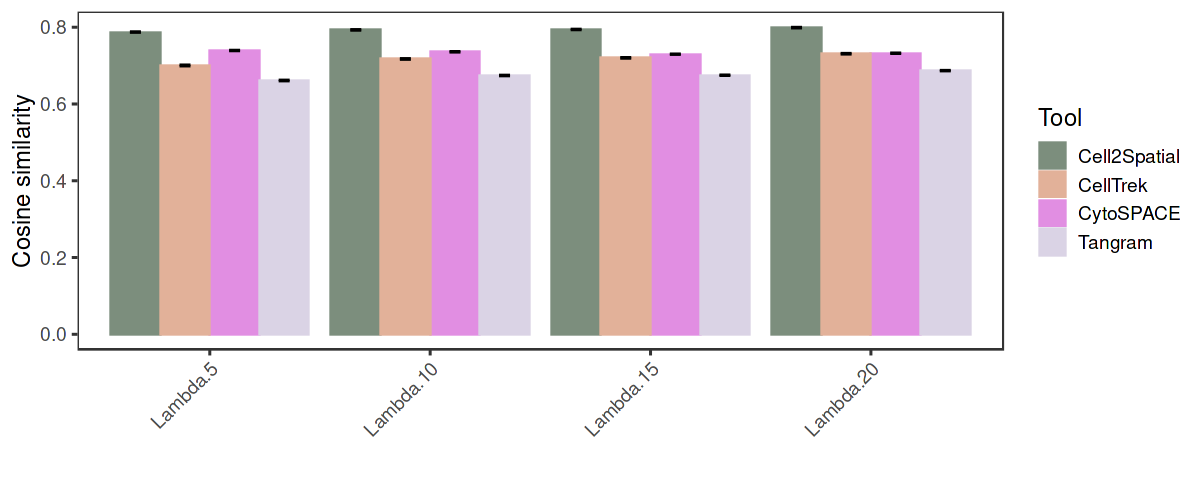

In [546]:
options(repr.plot.width = 10, repr.plot.height = 4)

plot.df$Tool <- factor(plot.df$Tool, levels = seg.tools[1 : 4])
plot.df$Group <- factor(plot.df$Group, levels = c('Lambda.5', 'Lambda.10', 'Lambda.15', 'Lambda.20'))
ggplot(plot.df, aes(x=as.factor(Group), y=mean, fill=Tool, color = Tool)) +
    geom_bar(position=position_dodge(), stat="identity") +
    geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), width=.2,position=position_dodge(.9), color = 'black') + 
    theme_bw(base_size = 14) + 
    theme(panel.grid = element_blank(), axis.text.x = element_text(angle = 45, hjust = 1)) + 
    xlab('') + ylab('Cosine similarity') + scale_fill_manual(values = COLS[levels(plot.df$Tool)])  + 
    scale_color_manual(values = COLS[levels(plot.df$Tool)]) 
ggsave(file.path(out.figs.dir, 'expresion.decom.pdf'), width = 10, height = 4)

In [627]:
obj.lst.sim.5 <- readRDS(file = file.path(out.data.dir, 'obj.lst.sim.5.RDS'))
obj.lst.sim.10 <- readRDS(file = file.path(out.data.dir, 'obj.lst.sim.10.RDS'))
obj.lst.sim.15 <- readRDS(file = file.path(out.data.dir, 'obj.lst.sim.15.RDS'))
obj.lst.sim.20 <- readRDS(file = file.path(out.data.dir, 'obj.lst.sim.20.RDS'))

In [651]:
sim5.res <- assessJacard2(obj.lst.sim.5, bg.random, ref.name = 'Sim.5', p.cut = 0.01)
sim10.res <- assessJacard2(obj.lst.sim.10, bg.random, ref.name = 'Sim.10', p.cut = 0.01)
sim15.res <- assessJacard2(obj.lst.sim.15, bg.random, ref.name = 'Sim.15', p.cut = 0.01)
sim20.res <- assessJacard2(obj.lst.sim.20, bg.random, ref.name = 'Sim.20', p.cut = 0.01)

In [657]:
plot.df <- rbind.data.frame(
    cbind.data.frame(sim5.res, CelllType = rownames(sim5.res), Source = 'Lambda=5'), 
    cbind.data.frame(sim10.res, CelllType = rownames(sim10.res), Source = 'Lambda=10'), 
    cbind.data.frame(sim15.res, CelllType = rownames(sim15.res), Source = 'Lambda=15'), 
    cbind.data.frame(sim20.res, CelllType = rownames(sim20.res), Source = 'Lambda=20')
)

In [660]:
head(plot.df)

,CytoSPACE,Cell2Spatial,Celltrek,Tangram,CelllType,Source
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Astro,0.49203187,0.6424474,0.35316699,0.28189300,Astro,Lambda=5
CR,0.05063291,0.1153846,0.04255319,0.02212389,CR,Lambda=5
Endo,0.10000000,0.2941176,0.10344828,0.09876543,Endo,Lambda=5
L2/3 IT,0.79561644,0.7949015,0.72029988,0.67546322,L2/3 IT,Lambda=5
L4,0.70908072,0.7507508,0.65773810,0.66190748,L4,Lambda=5
L5 IT,0.46405920,0.6488947,0.52292576,0.45322940,L5 IT,Lambda=5


In [698]:
plot.df.new <- tidyr::gather(plot.df, 'Tools', 'Jacc', -CelllType, -Source)
head(plot.df.new)

,CelllType,Source,Tools,Jacc
,<chr>,<chr>,<chr>,<dbl>
1,Astro,Lambda=5,CytoSPACE,0.49203187
2,CR,Lambda=5,CytoSPACE,0.05063291
3,Endo,Lambda=5,CytoSPACE,0.10000000
4,L2/3 IT,Lambda=5,CytoSPACE,0.79561644
5,L4,Lambda=5,CytoSPACE,0.70908072
6,L5 IT,Lambda=5,CytoSPACE,0.46405920


In [699]:
COLS.xx.new <- COLS.xx
names(COLS.xx.new)[3] <- 'Celltrek'

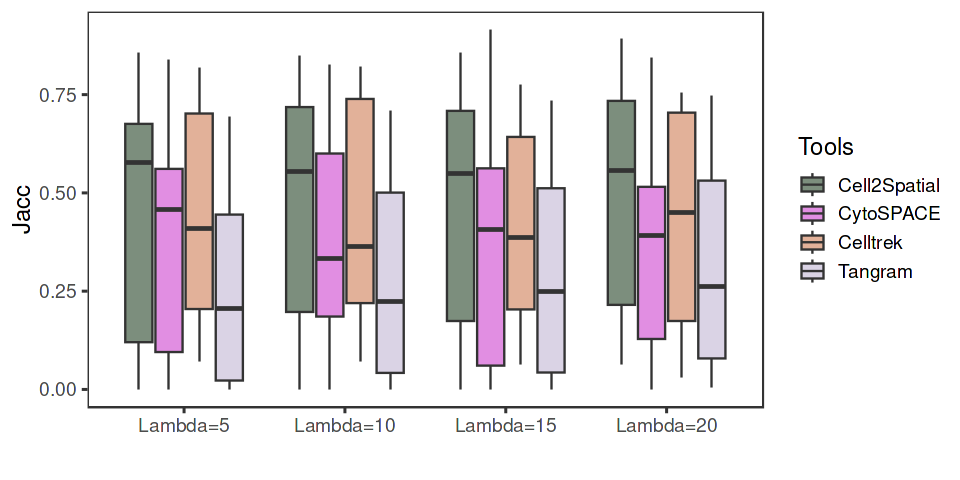

In [701]:
options(repr.plot.width = 8, repr.plot.height = 4)
plot.df.new$Tools <- factor(plot.df.new$Tools, levels = c('Cell2Spatial', 'CytoSPACE', 'Celltrek', 'Tangram'))
plot.df.new$Tools <- factor(plot.df.new$Tools, levels = c('Cell2Spatial', 'CytoSPACE', 'Celltrek', 'Tangram'))
plot.df.new$Source <- factor(plot.df.new$Source, levels = c('Lambda=5', 'Lambda=10', 'Lambda=15', 'Lambda=20'))
ggplot(plot.df.new, aes(x = Source, y = Jacc, group.by = Tools, fill = Tools)) +  geom_boxplot() + xlab('') + scale_fill_manual(values = COLS.xx.new) + theme_bw(base_size = 14) + theme(panel.grid = element_blank())
ggsave(file.path(out.figs.dir, 'novel.jacc.measure.pdf'), width = 8, height = 4)

### Conserve high varibale genes 

In [57]:
hvgConserve <- function(obj.lst, ref.name = 'Sim.5') {
    ref.obj <- obj.lst[[ref.name]] 
    DefaultAssay(ref.obj) <- 'Spatial'
    ref.obj <- ref.obj %>% NormalizeData %>% FindVariableFeatures(nfeatures = 500)
    ref.hvgs <- VariableFeatures(ref.obj)
    obj.lst.sub <- obj.lst[setdiff(names(obj.lst), ref.name)]
    hvg.res <- lapply(obj.lst.sub, function(qry.obj) {
        DefaultAssay(qry.obj) <- 'RNA'
        qry.obj <- qry.obj %>% NormalizeData %>% FindVariableFeatures(nfeatures = 500)
        qry.hvgs <- VariableFeatures(qry.obj)
        length(intersect(ref.hvgs, qry.hvgs)) / min(length(ref.hvgs), length(qry.hvgs))
    }) %>% unlist %>% as.vector
    return(hvg.res)
}

In [43]:
source('benchmarking/readBenchmarkRes.R')

In [632]:
obj.st.5 <- readRDS('benchmarking/data/stxBrain.sim.5.rds')

In [12]:
obj.lst.sim.5 <- exprDecom(obj.sc, obj.st.5, out.dir = 'benchmarking/results/Sim.5')

In [635]:
obj.st.20 <- readRDS('benchmarking/data/stxBrain.sim.20.rds')

In [13]:
obj.st.10 <- readRDS('benchmarking/data/stxBrain.sim.10.rds')
obj.lst.sim.10 <- exprDecom(obj.sc, obj.st.10, out.dir = 'benchmarking/results/Sim.10')

In [14]:
obj.st.15 <- readRDS('benchmarking/data/stxBrain.sim.15.rds')
obj.lst.sim.15 <- exprDecom(obj.sc, obj.st.15, out.dir = 'benchmarking/results/Sim.15')

In [15]:
obj.st.20 <- readRDS('benchmarking/data/stxBrain.sim.20.rds')
obj.lst.sim.20 <- exprDecom(obj.sc, obj.st.20, out.dir = 'benchmarking/results/Sim.20')

In [41]:
obj.lst.sim.5 <- readRDS(file = file.path(out.data.dir, 'obj.lst.sim.5.RDS'))
obj.lst.sim.10 <- readRDS(file = file.path(out.data.dir, 'obj.lst.sim.10.RDS'))
obj.lst.sim.15 <- readRDS(file = file.path(out.data.dir, 'obj.lst.sim.15.RDS'))
obj.lst.sim.20 <- readRDS(file = file.path(out.data.dir, 'obj.lst.sim.20.RDS'))

In [636]:
obj.lst.sim.5[['Sim.5']] <- obj.st.5
obj.lst.sim.10[['Sim.10']] <- obj.st.10
obj.lst.sim.15[['Sim.15']] <- obj.st.15
obj.lst.sim.20[['Sim.20']] <- obj.st.20

In [62]:
hvg.5 <- hvgConserve(obj.lst.sim.5,  ref.name = 'Sim.5')
hvg.10 <- hvgConserve(obj.lst.sim.10,  ref.name = 'Sim.10')
hvg.15 <- hvgConserve(obj.lst.sim.15,  ref.name = 'Sim.15')
hvg.20 <- hvgConserve(obj.lst.sim.20,  ref.name = 'Sim.20')

In [106]:
plot.df <- rbind.data.frame(
    cbind.data.frame(HVG = hvg.5, Sim = 'Lambda=5', Tools = names(obj.lst.sim.5)[1 : 4]),
    cbind.data.frame(HVG = hvg.10, Sim = 'Lambda=10', Tools = names(obj.lst.sim.5)[1 : 4]), 
    cbind.data.frame(HVG = hvg.15, Sim = 'Lambda=15', Tools = names(obj.lst.sim.5)[1 : 4]), 
    cbind.data.frame(HVG = hvg.20, Sim = 'Lambda=20', Tools = names(obj.lst.sim.5)[1 : 4])
)

In [107]:
COLS.xx <- c(
    Cell2Spatial = '#7C8E7D',
    CytoSPACE = '#E18EE2',
    Celltrek = '#E2B199',
    Tangram = '#DAD3E5'
)

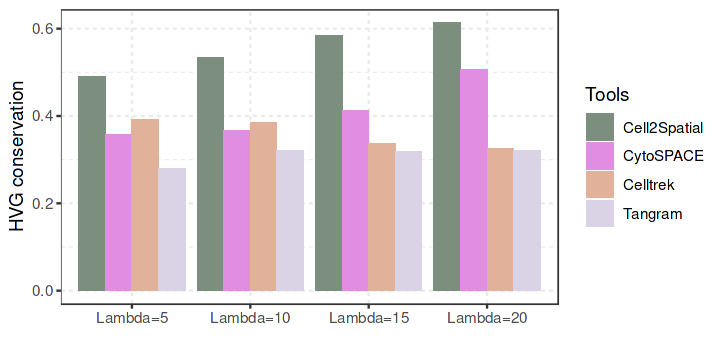

In [110]:
options(repr.plot.width = 6, repr.plot.height = 3)
plot.df$Sim <- factor(plot.df$Sim, levels = c('Lambda=5', 'Lambda=10', 'Lambda=15', 'Lambda=20'))
plot.df$Tools <- factor(plot.df$Tools, levels = c('Cell2Spatial', 'CytoSPACE', 'Celltrek', 'Tangram'))
ggplot(plot.df, aes(x = Sim, y = HVG, fill = Tools)) + geom_bar(stat = 'identity', position = 'dodge') + theme_bw() + xlab('') + scale_fill_manual(values = COLS.xx[levels(plot.df$Tools)]) + ylab('HVG conservation') + theme(panel.grid = element_line(linetype = 'dashed')) 

ggsave(file.path(out.figs.dir, 'hvg.cons.benchmarking.pdf'), width = 6, height = 3)

### KL-divergence for benchamrking data sets

In [145]:
options(warn = -1)
devtools::load_all('./.tmp/CellTrek-main')
source('modules/utils.R')
source('modules/reformatProjRes.R')
source('benchmarking/readBenchmarkRes.R')

ℹ Loading CellTrek


In [413]:
KL_ <- function(X, Y, eps=1e-50) {
    X_ <- X
    X_[X_<eps] <- eps
    Y_ <- Y
    Y_[Y_<eps] <- eps   
    X_ <- scale(X_, center=F, scale=colSums(X_)) %>% data.frame
    Y_ <- scale(Y_, center=F, scale=colSums(Y_)) %>% data.frame    
    res <- lapply(colnames(X_), function(ct) {
        if (!(ct %in% colnames(Y_))) KL_D <- 10
        else {
            tmp.df <- cbind.data.frame(Ref = X_[, ct], Qry = Y_[, ct])
            KL_D <- suppressMessages(philentropy::KL(t(tmp.df), unit='log'))
            #KL_D[is.infinite(KL_D)] <- 650
        }
    }) %>% unlist %>% as.vector %>% `names<-`(colnames(X))
    return(res)
}

In [403]:
densityDf <- function(obj.df) {    
    cell_dummy_df <- as_dummy_df(obj.df %>% dplyr::select(cell_names, coord_x, coord_y), col_cell='cell_names')
    dummy_df <- cell_dummy_df[, c(4 : ncol(cell_dummy_df))]
    coord_df <- cell_dummy_df[, c(2, 3)]
    Xlim <- range(coord_df[, 1])
    Ylim <- range(coord_df[, 2])    
    k2d_boot <- sp_grid_kern_bin(data=dummy_df, coord=cell_dummy_df[, c(3, 4)], min_num=10, Xlim=Xlim, Ylim=Ylim, h=100, n=20, tot_norm=T)
    dis_boot <- k2d_boot[, -c(1, 2)] 
    return(dis_boot)
}

In [119]:
obj.cell2spatial <- read.table('benchmarking/results/Sim.5/cytospace.stxBrain/assigned_locations.csv', sep = ',', header = TRUE)
head(obj.cell2spatial)

,UniqueCID,OriginalCID,CellType,SpotID,row,col
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,UCID00000,F2S4_160121_006_A01,Lamp5,TCATCCTCAGCTGCTT.1,497.2978,396.2995
2,UCID00001,F2S4_151223_004_F01,Lamp5,CAAGCGGCACATAATT.1,410.7057,332.3236
3,UCID00002,F2S4_160404_050_B01,Lamp5,TGCCAGTACGTGGAGA.1,392.1687,328.7608
4,UCID00003,F2S4_160115_028_F01,Lamp5,TACTTTCCGCACGCCA.1,367.4355,143.9587
5,UCID00004,F2S4_170707_005_E01,Lamp5,CACAGTCCCGCTTCGC.1,447.8313,474.4751
6,UCID00005,F2S4_160504_010_F01,Lamp5,TCATCCTCAGCTGCTT.1,497.2978,396.2995


In [120]:
obj.df <- obj.cell2spatial[, c('CellType', 'row', 'col')] %>% `colnames<-`(c('cell_names', 'coord_x', 'coord_y'))

In [150]:
obj.sc <- readRDS('benchmarking/data/allen_cortex.rds')

In [365]:
obj.st <- readRDS('benchmarking/data/stxBrain.sim.5.rds')
cytospace.Sim5 <- forCytoSpace('./benchmarking/results/Sim.5/cytospace.stxBrain/', obj.sc, obj.st)
#tangram.Sim5 <- forTangram('../2.results/sim/data/sim.5_tangram.xls', obj.sc, obj.st)
tangram.Sim5 <- forTangramSim('./benchmarking/results/Sim.5/Tangram_map2space.xls', obj.sc, obj.st)
#cell.trek.Sim5 <- readRDS('./benchmarking/results/Sim.5/stxBrain.celltrek.RDS') %>% { forCellTrek(list(xx = .), obj.sc, obj.st) }
cell2spatial.Sim5 <- readRDS('./benchmarking/results/Sim.5/cell2spatial.unmatched.RDS')

In [152]:
obj.st <- readRDS('benchmarking/data/stxBrain.sim.10.rds')
cytospace.Sim10 <- forCytoSpace('./benchmarking/results/Sim.10/cytospace.stxBrain/', obj.sc, obj.st)
tangram.Sim10 <- forTangramSim('./benchmarking/results/Sim.10/Tangram_map2space.xls', obj.sc, obj.st)
#cell.trek.Sim10 <- readRDS('./benchmarking/results/Sim.10/stxBrain.celltrek.RDS') %>% { forCellTrek(list(xx = .), obj.sc, obj.st) }
cell2spatial.Sim10 <- readRDS('./benchmarking/results/Sim.10/cell2spatial.unmatched.RDS')

In [153]:
obj.st <- readRDS('benchmarking/data/stxBrain.sim.15.rds')
cytospace.Sim15 <- forCytoSpace('./benchmarking/results/Sim.15/cytospace.stxBrain/', obj.sc, obj.st)
tangram.Sim15 <- forTangramSim('./benchmarking/results/Sim.15/Tangram_map2space.xls', obj.sc, obj.st)
cell.trek.Sim15 <- readRDS('./benchmarking/results/Sim.15/stxBrain.celltrek.RDS') %>% { forCellTrek(list(xx = .), obj.sc, obj.st) }
cell2spatial.Sim15 <- readRDS('./benchmarking/results/Sim.15/cell2spatial.unmatched.RDS')

In [154]:
obj.st <- readRDS('benchmarking/data/stxBrain.sim.20.rds')
cytospace.Sim20 <- forCytoSpace('./benchmarking/results/Sim.20/cytospace.stxBrain/', obj.sc, obj.st)
tangram.Sim20 <- forTangramSim('./benchmarking/results/Sim.20/Tangram_map2space.xls', obj.sc, obj.st)
#cell.trek.Sim20 <- readRDS('./benchmarking/results/Sim.20/stxBrain.celltrek.RDS') %>% { forCellTrek(list(xx = .), obj.sc, obj.st) }
cell2spatial.Sim20 <- readRDS('./benchmarking/results/Sim.20/cell2spatial.unmatched.RDS')

In [414]:
ture.sim5 <- readRDS('./benchmarking/data/stxBrain.5.true.coord.rds')[, c('CellType', 'x.new', 'y.new')] %>% `colnames<-`(c('cell_names', 'coord_x', 'coord_y'))
ture.sim10 <- readRDS('./benchmarking/data/stxBrain.10.true.coord.rds')[, c('CellType', 'x.new', 'y.new')] %>% `colnames<-`(c('cell_names', 'coord_x', 'coord_y'))
ture.sim15 <- readRDS('./benchmarking/data/stxBrain.15.true.coord.rds')[, c('CellType', 'x.new', 'y.new')] %>% `colnames<-`(c('cell_names', 'coord_x', 'coord_y'))
ture.sim20 <- readRDS('./benchmarking/data/stxBrain.20.true.coord.rds')[, c('CellType', 'x.new', 'y.new')] %>% `colnames<-`(c('cell_names', 'coord_x', 'coord_y'))

In [415]:
head(ture.sim5)

,cell_names,coord_x,coord_y
,<fct>,<dbl>,<dbl>
AAACAAGTATCTCCCA-1,Oligo,387.7670,439.9820
AAACAAGTATCTCCCA-1.1,Oligo,385.5167,439.0420
AAACAAGTATCTCCCA-1.2,Pvalb,387.5535,439.4452
AAACAAGTATCTCCCA-1.3,Pvalb,386.8448,435.9195
AAACAAGTATCTCCCA-1.4,Pvalb,386.5805,436.1109
AAACAAGTATCTCCCA-1.5,Pvalb,385.8109,438.6173


In [416]:
cytospace.kl <- cytospace.Sim5@meta.data[, c('CellType', 'x.new', 'y.new')] %>% `colnames<-`(c('cell_names', 'coord_x', 'coord_y'))
tangram.kl <- tangram.Sim5@meta.data[, c('subclass', 'x.new', 'y.new')] %>% `colnames<-`(c('cell_names', 'coord_x', 'coord_y'))
celltrek.kl <- cell.trek.Sim5@meta.data[, c('subclass', 'imagerow', 'imagecol')] %>% `colnames<-`(c('cell_names', 'coord_x', 'coord_y'))
cell2spatial.kl <- cell2spatial.Sim5@meta.data[, c('Cell2Spatial', 'x', 'y')] %>% `colnames<-`(c('cell_names', 'coord_x', 'coord_y'))

In [404]:
res.5 <- lapply(unique(ture.sim5[, 1]), function(xx) {
    ctype <- xx
    df.bak <- rbind.data.frame(
        subset(cytospace.kl, cell_names == ctype) %>% mutate(cell_names = 'CytoSPACE'),
        subset(tangram.kl, cell_names == ctype) %>% mutate(cell_names = 'Tangram'),
        subset(celltrek.kl, cell_names == ctype) %>% mutate(cell_names = 'CellTrek'),
        subset(cell2spatial.kl, cell_names == ctype) %>% mutate(cell_names = 'Cell2Spatial'),
        subset(ture.sim5, cell_names == ctype) %>% mutate(cell_names = 'Truth')
    )
    X <- densityDf(df.bak)
    KL_(X)['Truth', ]
}) %>% do.call(rbind, .) %>% `rownames<-`(unique(ture.sim5[, 1]))

In [417]:
ture.density <- densityDf(ture.sim5)
cytospace.kl <- densityDf(cytospace.kl)
cytospace.kl <- KL_(ture.density, cytospace.kl)

tangram.kl <- densityDf(tangram.kl)
tangram.kl <- KL_(ture.density, tangram.kl)

celltrek.kl <- densityDf(celltrek.kl)
celltrek.kl <- KL_(ture.density, celltrek.kl)

cell2spatial.kl <- densityDf(cell2spatial.kl)
cell2spatial.kl <- KL_(ture.density, cell2spatial.kl)

plot.df1 <- rbind.data.frame(
    cbind.data.frame(KL = cell2spatial.kl, Tool = 'Cell2Spatial', Dataset = 'Lambda=5', Celltype = colnames(ture.density)),
    cbind.data.frame(KL = cytospace.kl, Tool = 'CytoSPACE', Dataset = 'Lambda=5', Celltype = colnames(ture.density)),
    cbind.data.frame(KL = celltrek.kl, Tool = 'CellTrek', Dataset = 'Lambda=5', Celltype = colnames(ture.density)),
    cbind.data.frame(KL = tangram.kl, Tool = 'Tangram', Dataset = 'Lambda=5', Celltype = colnames(ture.density))   
)

In [418]:
cytospace.kl <- cytospace.Sim10@meta.data[, c('CellType', 'x.new', 'y.new')] %>% `colnames<-`(c('cell_names', 'coord_x', 'coord_y'))
tangram.kl <- tangram.Sim10@meta.data[, c('subclass', 'x.new', 'y.new')] %>% `colnames<-`(c('cell_names', 'coord_x', 'coord_y'))
celltrek.kl <- cell.trek.Sim10@meta.data[, c('subclass', 'imagerow', 'imagecol')] %>% `colnames<-`(c('cell_names', 'coord_x', 'coord_y'))
cell2spatial.kl <- cell2spatial.Sim10@meta.data[, c('Cell2Spatial', 'x', 'y')] %>% `colnames<-`(c('cell_names', 'coord_x', 'coord_y'))

In [419]:
head(ture.sim10)

,cell_names,coord_x,coord_y
,<fct>,<dbl>,<dbl>
AAACAAGTATCTCCCA-1,Oligo,388.4896,440.3976
AAACAAGTATCTCCCA-1.1,Oligo,385.6099,439.0232
AAACAAGTATCTCCCA-1.2,Pvalb,387.9113,439.5573
AAACAAGTATCTCCCA-1.3,Pvalb,386.5286,437.0181
AAACAAGTATCTCCCA-1.4,Pvalb,386.4675,436.6387
AAACAAGTATCTCCCA-1.5,Pvalb,384.5789,436.0795


In [420]:
ture.density <- densityDf(ture.sim10)
cytospace.kl <- densityDf(cytospace.kl)
cytospace.kl <- KL_(ture.density, cytospace.kl)

tangram.kl <- densityDf(tangram.kl)
tangram.kl <- KL_(ture.density, tangram.kl)

celltrek.kl <- densityDf(celltrek.kl)
celltrek.kl <- KL_(ture.density, celltrek.kl)

cell2spatial.kl <- densityDf(cell2spatial.kl)
cell2spatial.kl <- KL_(ture.density, cell2spatial.kl)

plot.df2 <- rbind.data.frame(
    cbind.data.frame(KL = cell2spatial.kl, Tool = 'Cell2Spatial', Dataset = 'Lambda=10', Celltype = colnames(ture.density)),
    cbind.data.frame(KL = cytospace.kl, Tool = 'CytoSPACE', Dataset = 'Lambda=10', Celltype = colnames(ture.density)),
    cbind.data.frame(KL = celltrek.kl, Tool = 'CellTrek', Dataset = 'Lambda=10', Celltype = colnames(ture.density)),
    cbind.data.frame(KL = tangram.kl, Tool = 'Tangram', Dataset = 'Lambda=10', Celltype = colnames(ture.density))   
)

In [421]:
cytospace.kl <- cytospace.Sim15@meta.data[, c('CellType', 'x.new', 'y.new')] %>% `colnames<-`(c('cell_names', 'coord_x', 'coord_y'))
tangram.kl <- tangram.Sim15@meta.data[, c('subclass', 'x.new', 'y.new')] %>% `colnames<-`(c('cell_names', 'coord_x', 'coord_y'))
celltrek.kl <- cell.trek.Sim15@meta.data[, c('subclass', 'imagerow', 'imagecol')] %>% `colnames<-`(c('cell_names', 'coord_x', 'coord_y'))
cell2spatial.kl <- cell2spatial.Sim15@meta.data[, c('Cell2Spatial', 'x', 'y')] %>% `colnames<-`(c('cell_names', 'coord_x', 'coord_y'))

In [422]:
ture.density <- densityDf(ture.sim15)
cytospace.kl <- densityDf(cytospace.kl)
cytospace.kl <- KL_(ture.density, cytospace.kl)

tangram.kl <- densityDf(tangram.kl)
tangram.kl <- KL_(ture.density, tangram.kl)

celltrek.kl <- densityDf(celltrek.kl)
celltrek.kl <- KL_(ture.density, celltrek.kl)

cell2spatial.kl <- densityDf(cell2spatial.kl)
cell2spatial.kl <- KL_(ture.density, cell2spatial.kl)

plot.df3 <- rbind.data.frame(
    cbind.data.frame(KL = cell2spatial.kl, Tool = 'Cell2Spatial', Dataset = 'Lambda=15', Celltype = colnames(ture.density)),
    cbind.data.frame(KL = cytospace.kl, Tool = 'CytoSPACE', Dataset = 'Lambda=15', Celltype = colnames(ture.density)),
    cbind.data.frame(KL = celltrek.kl, Tool = 'CellTrek', Dataset = 'Lambda=15', Celltype = colnames(ture.density)),
    cbind.data.frame(KL = tangram.kl, Tool = 'Tangram', Dataset = 'Lambda=15', Celltype = colnames(ture.density))   
)

In [423]:
cytospace.kl <- cytospace.Sim20@meta.data[, c('CellType', 'x.new', 'y.new')] %>% `colnames<-`(c('cell_names', 'coord_x', 'coord_y'))
tangram.kl <- tangram.Sim20@meta.data[, c('subclass', 'x.new', 'y.new')] %>% `colnames<-`(c('cell_names', 'coord_x', 'coord_y'))
celltrek.kl <- cell.trek.Sim20@meta.data[, c('subclass', 'imagerow', 'imagecol')] %>% `colnames<-`(c('cell_names', 'coord_x', 'coord_y'))
cell2spatial.kl <- cell2spatial.Sim20@meta.data[, c('Cell2Spatial', 'x', 'y')] %>% `colnames<-`(c('cell_names', 'coord_x', 'coord_y'))

In [424]:
ture.density <- densityDf(ture.sim20)
cytospace.kl <- densityDf(cytospace.kl)
cytospace.kl <- KL_(ture.density, cytospace.kl)

tangram.kl <- densityDf(tangram.kl)
tangram.kl <- KL_(ture.density, tangram.kl)

celltrek.kl <- densityDf(celltrek.kl)
celltrek.kl <- KL_(ture.density, celltrek.kl)

cell2spatial.kl <- densityDf(cell2spatial.kl)
cell2spatial.kl <- KL_(ture.density, cell2spatial.kl)

plot.df4 <- rbind.data.frame(
    cbind.data.frame(KL = cell2spatial.kl, Tool = 'Cell2Spatial', Dataset = 'Lambda=20', Celltype = colnames(ture.density)),
    cbind.data.frame(KL = cytospace.kl, Tool = 'CytoSPACE', Dataset = 'Lambda=20', Celltype = colnames(ture.density)),
    cbind.data.frame(KL = celltrek.kl, Tool = 'CellTrek', Dataset = 'Lambda=20', Celltype = colnames(ture.density)),
    cbind.data.frame(KL = tangram.kl, Tool = 'Tangram', Dataset = 'Lambda=20', Celltype = colnames(ture.density))   
)

In [505]:
plot.df <- rbind.data.frame(plot.df1, plot.df2, plot.df3, plot.df4)
plot.df$KL <- log2(plot.df$KL + 1)

In [506]:
names(COLS.xx)[3] <- 'CellTrek'

In [509]:
options(repr.plot.width = 12, repr.plot.height = 6)
plot.df$Dataset <- factor(plot.df$Dataset, levels = c('Lambda=5', 'Lambda=10', 'Lambda=15', 'Lambda=20'))
plot.df$Tool <- factor(plot.df$Tool, levels = c('Cell2Spatial', 'CytoSPACE', 'CellTrek', 'Tangram'))
gp <- ggplot(plot.df, aes(x = Celltype, y = KL, color = Tool, shape = Tool, line = Tool, group = Tool)) + geom_point(aes(color = Tool), size = 4) + geom_line() + facet_wrap(~Dataset) + xlab('') + theme_bw() + theme(panel.grid = element_blank(), axis.text.x = element_text(angle = 45, hjust = 1)) + ylab('KL Distance') + scale_color_manual(values = COLS.xx[levels(plot.df$Tool)])

ggsave(file.path(out.figs.dir, 'KL.dist.benchmarking.pdf'), width = 12, height = 6)
openxlsx::write.xlsx(plot.df, file.path(out.data.dir, 'KL.dist.benchmarking.xlsx'), rowNames = TRUE)

In [603]:
sessionInfo()

R version 4.4.0 (2024-04-24)
Platform: x86_64-pc-linux-gnu
Running under: Ubuntu 22.04.2 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas-pthread/libblas.so.3 
LAPACK: /usr/lib/x86_64-linux-gnu/openblas-pthread/libopenblasp-r0.3.20.so;  LAPACK version 3.10.0

locale:
 [1] LC_CTYPE=C.UTF-8    LC_NUMERIC=C        LC_TIME=C          
 [4] LC_COLLATE=C        LC_MONETARY=C       LC_MESSAGES=C      
 [7] LC_PAPER=C          LC_NAME=C           LC_ADDRESS=C       
[10] LC_TELEPHONE=C      LC_MEASUREMENT=C    LC_IDENTIFICATION=C

time zone: Asia/Chongqing
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] SeuratDisk_0.0.0.9020 plyr_1.8.9            viridisLite_0.4.2    
 [4] ggpubr_0.6.0          stringr_1.5.1         reticulate_1.37.0    
 [7] dplyr_1.1.4           ggplot2_3.5.1         SeuratObject_4.1.4   
[10] Seurat_4.4.0         

loaded via a namespace (a